### Necessary Libraries and Data Import

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
warnings.filterwarnings(action="ignore",category=DeprecationWarning)

pd.pandas.set_option("display.max_rows",None)
pd.pandas.set_option("display.max_columns",None)

In [72]:
df1=pd.read_csv("CT Ananlysis.csv")

In [73]:
df1.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,16,82
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,16,82
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,20,97
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,35,101
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,46,101


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   EngineeringGroup      7074 non-null   object
 1   PlanResourceTypeName  7074 non-null   object
 2   Region                7074 non-null   object
 3   RegionGroup           7074 non-null   object
 4   RegionType            7074 non-null   object
 5   IsMainstream          7074 non-null   object
 6   NewRegionFlag         7074 non-null   bool  
 7   NewDCFlag             7074 non-null   bool  
 8   PlanIntentName        7074 non-null   object
 9   IsNPI                 7074 non-null   bool  
 10  NewTechFlag           7074 non-null   int64 
 11  DeploymentSeverity    7074 non-null   int64 
 12  NumberOfRacks         7074 non-null   int64 
 13  _CT_SIGNAL_TO_DOCK    7074 non-null   int64 
 14  _CT_SIGNAL_TO_LIVE    7074 non-null   int64 
dtypes: bool(3), int64(5), object(7)
memory

In [75]:
df1.columns

Index(['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup',
       'RegionType', 'IsMainstream', 'NewRegionFlag', 'NewDCFlag',
       'PlanIntentName', 'IsNPI', 'NewTechFlag', 'DeploymentSeverity',
       'NumberOfRacks', '_CT_SIGNAL_TO_DOCK', '_CT_SIGNAL_TO_LIVE'],
      dtype='object')

In [76]:
df1[:].nunique() #Checking unique catogories in each feature 

EngineeringGroup         15
PlanResourceTypeName     93
Region                   73
RegionGroup               3
RegionType                3
IsMainstream              2
NewRegionFlag             2
NewDCFlag                 2
PlanIntentName           10
IsNPI                     2
NewTechFlag               2
DeploymentSeverity        3
NumberOfRacks            29
_CT_SIGNAL_TO_DOCK      275
_CT_SIGNAL_TO_LIVE      456
dtype: int64

In [77]:
#lets explore each feature seperatly 
df1["EngineeringGroup"].value_counts() #There are few Rare catogories 

Azure               4382
O365 Exchange       1618
Azure Data Lake      334
O365 SharePoint      234
Search               230
FOPE                 127
CloudBuild            46
SAP HANA              30
Xbox                  23
Azure AD (MSODS)      18
OneDrive              16
NonWebComm             7
Azure Key Vault        5
Unassigned             3
Azure Front Door       1
Name: EngineeringGroup, dtype: int64

In [78]:
df1["PlanResourceTypeName"].value_counts() #There are few Rare catogories 

Compute                   1518
Storage                    693
XIO Storage                493
BackEnd                    480
ActiveDirectory            399
FrontEnd                   390
PilotFish                  378
XIO Compute                326
Cosmos                     261
Search                     235
SQL Azure                  193
Compute-SPO                135
Fv2 Compute                127
Dedicated                  119
Substrate                   80
Kona/ADL                    73
GPU Remote Viz              58
Compute-FAST                56
M-Series                    54
EOP-Sonar/ATP               52
CloudBuild                  46
EOP-Capacity                37
Cafe                        36
Xtransport                  34
Torus                       33
Management                  32
PRD                         31
Godzilla                    30
HPC                         30
GPU-v Compute Gen 5.0       28
GPU Compute                 27
EOP-DI                      27
ZRS Stor

In [79]:
df1["Region"].value_counts() #There are few Rare catogories 

West Europe             632
East US                 580
East US 2               530
North Europe            505
Central US              497
West US 2               444
West US                 437
South Central US        397
West Central US         274
North Central US        231
Southeast Asia          225
East Asia               185
Japan East              177
Australia East          169
UK South                164
Australia Southeast     117
UK West                  95
Japan West               95
East Europe              93
Canada Central           83
Brazil South             72
France Central           68
Korea Central            62
South India              62
Korea South              53
Canada East              52
Central India            51
Europe North 2           45
USGov Virginia           44
West India               43
China North              33
China East               30
Germany Central          26
USGov Arizona            26
South Africa North       26
China East 2        

In [80]:
df1["RegionGroup"].value_counts()

Not Restricted    6738
Restricted         315
Unassigned          21
Name: RegionGroup, dtype: int64

In [81]:
df1["RegionType"].value_counts()

Hero         3677
Hub          2176
Satellite    1221
Name: RegionType, dtype: int64

In [82]:
df1["PlanIntentName"].value_counts()  #There are few Rare catogories 

Growth             6059
Decomm Complete     290
Pilot               237
Secondary           216
DecommPair          181
Reservation          40
R&D                  23
Test-Prod            14
Test                 12
PilotSecondary        2
Name: PlanIntentName, dtype: int64

In [83]:
#lets convert catogorical features as Object datatype 
obj_fearure=['NewTechFlag','DeploymentSeverity','NewRegionFlag','IsNPI','NewDCFlag']
df1[obj_fearure] = df1[obj_fearure].astype('object')

In [84]:
df1.describe() #Lets check the stats of the Numerical Features in our Dataset

,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
count,7074.000000,7074.000000,7074.000000
mean,13.038168,82.680662,171.829092
std,7.542796,45.548239,91.995155
min,1.000000,0.000000,8.000000
25%,7.000000,54.000000,103.000000
50%,16.000000,75.000000,154.000000
75%,20.000000,103.000000,217.000000
max,60.000000,728.000000,595.000000


### Visualization  

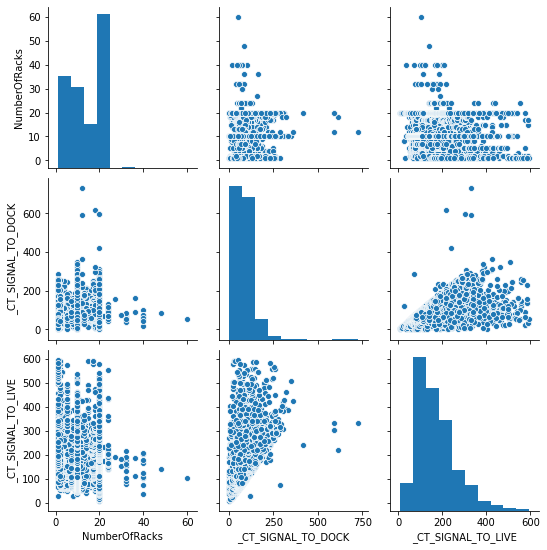

In [85]:
sns.pairplot(df1.select_dtypes(include='int64')) 

#There is no direct linear relation between no of racks and _CT_SIGNAL_TO_LIVE
#We could roughly say, CT_signal_to_Dock and CT_signal_to_Live has light Positive corelation. 

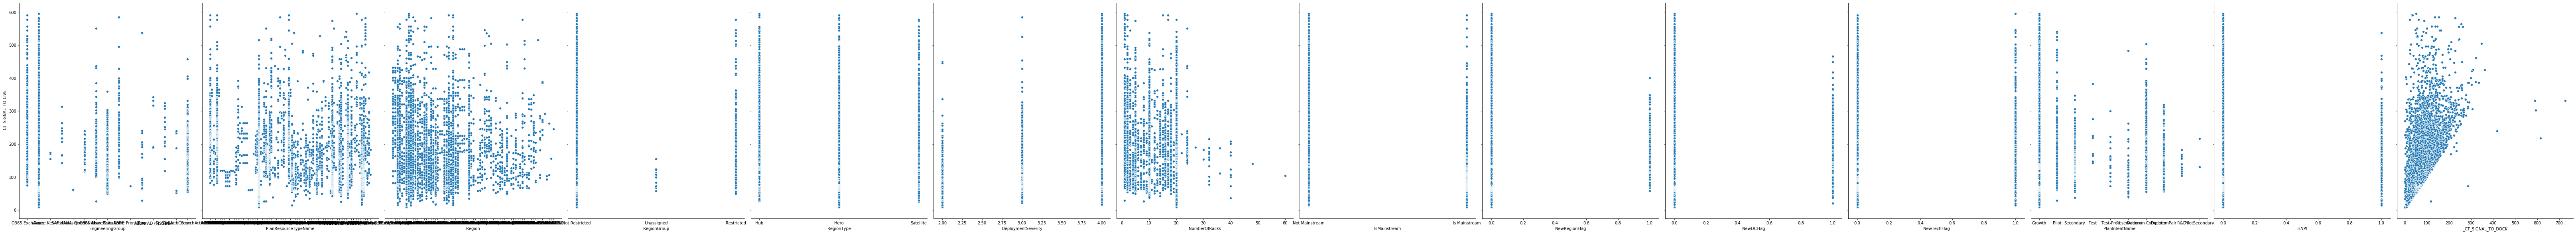

In [86]:
# lets see the relationship between all th features and the Traget using scatterplots
sns.pairplot(df1, x_vars=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup',
       'RegionType', 'DeploymentSeverity', 'NumberOfRacks', 'IsMainstream',
       'NewRegionFlag', 'NewDCFlag', 'NewTechFlag', 'PlanIntentName', 'IsNPI',
       '_CT_SIGNAL_TO_DOCK'], y_vars='_CT_SIGNAL_TO_LIVE',height=8, aspect=0.8, kind='scatter')

### Lets Explore our Target Variable more 

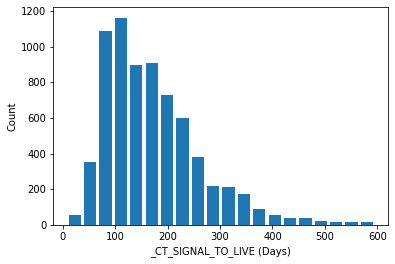

In [87]:
plt.hist(df1["_CT_SIGNAL_TO_LIVE"], bins=20, rwidth=0.8)
plt.xlabel('_CT_SIGNAL_TO_LIVE (Days)')
plt.ylabel('Count')
plt.show()

In [88]:
#Its not normally distributed but still not that much skewed as well. more Like Log distributed. 

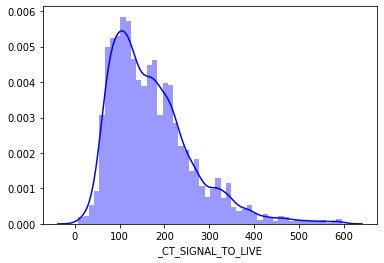

In [89]:
sns.distplot(df1["_CT_SIGNAL_TO_LIVE"], color="blue",kde=True) #Lets see the distribusion curve 

In [90]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df1[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

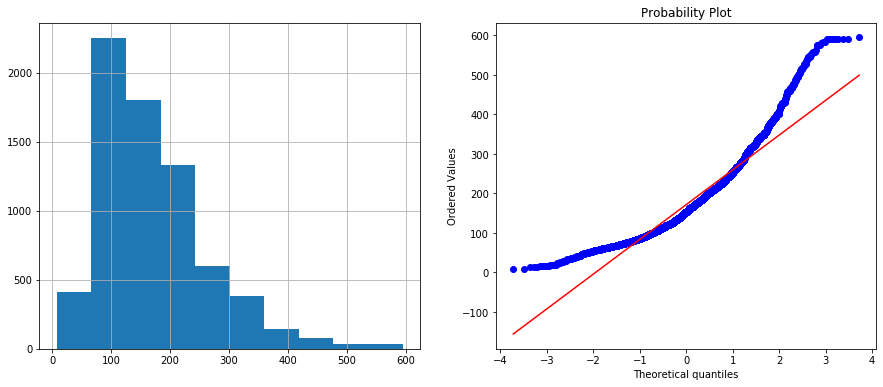

In [91]:
diagnostic_plots(df1, "_CT_SIGNAL_TO_LIVE")

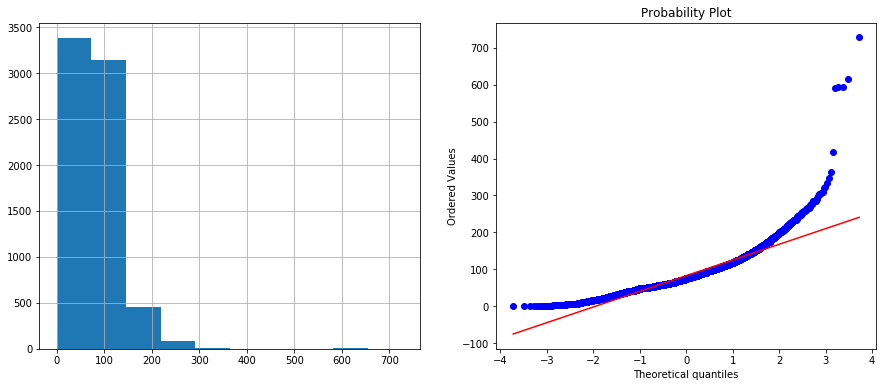

In [92]:
diagnostic_plots(df1, "_CT_SIGNAL_TO_DOCK")

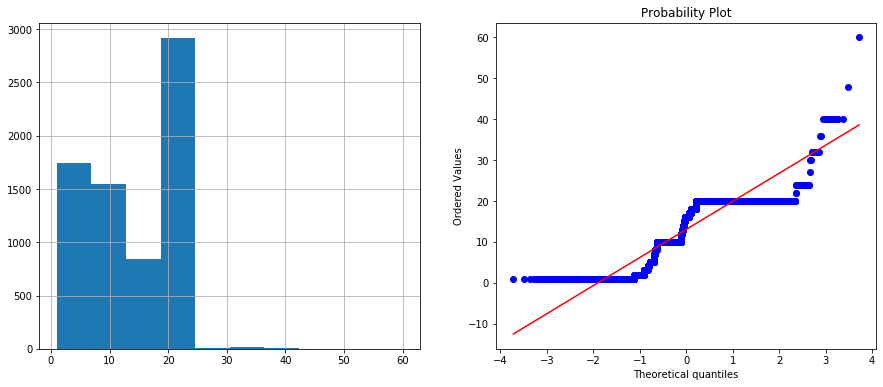

In [93]:
diagnostic_plots(df1, "NumberOfRacks") #NumberofRacks is a discrete variable so this distribution is expected.  

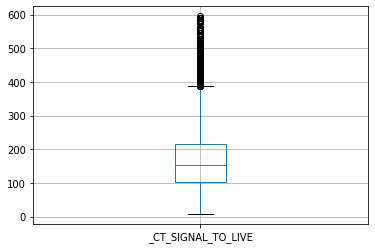

In [94]:
df1.boxplot(column="_CT_SIGNAL_TO_LIVE") #Lets See the extream values in out Target Varibale using box plot  
plt.show()

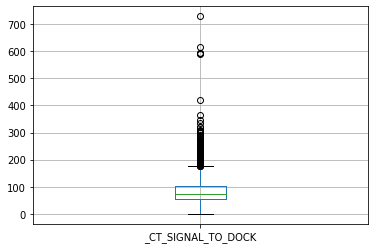

In [95]:
df1.boxplot(column="_CT_SIGNAL_TO_DOCK") #Lets See the extream values in _CT_SIGNAL_TO_DOCK Varibale using box plot  
plt.show()

### Random Forest Regressor

In [23]:
#First of all lets make use of Non-parametric model-Random Forest Regressor to make predictions and Error Calculations 

In [24]:
df2=df1.copy()
df2.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,O365 Exchange,ActiveDirectory,East Europe,Not Restricted,Hub,Not Mainstream,False,False,Growth,False,0,3,1,16,82
1,O365 Exchange,ActiveDirectory,Europe North 2,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,16,82
2,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,20,97
3,O365 Exchange,ActiveDirectory,West Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,3,1,35,101
4,O365 Exchange,ActiveDirectory,North Europe,Not Restricted,Hero,Not Mainstream,False,False,Growth,False,0,4,1,46,101


In [25]:
#Lest label encode the catogorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
le=LabelEncoder()
cat_features=['EngineeringGroup', 'PlanResourceTypeName', 'Region', 'RegionGroup','RegionType', 'IsMainstream', 
              'NewRegionFlag', 'NewDCFlag', 'PlanIntentName', 'IsNPI']
      
df2[cat_features] = df1[cat_features].apply(le.fit_transform)

In [27]:
df2.head()

,EngineeringGroup,PlanResourceTypeName,Region,RegionGroup,RegionType,IsMainstream,NewRegionFlag,NewDCFlag,PlanIntentName,IsNPI,NewTechFlag,DeploymentSeverity,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE
0,8,3,22,0,1,1,0,0,2,0,0,3,1,16,82
1,8,3,28,0,0,1,0,0,2,0,0,3,1,16,82
2,8,3,69,0,0,1,0,0,2,0,0,3,1,20,97
3,8,3,69,0,0,1,0,0,2,0,0,3,1,35,101
4,8,3,40,0,0,1,0,0,2,0,0,4,1,46,101


In [100]:
#lets define our predictors and outcome (Target)
x=df2.drop("_CT_SIGNAL_TO_LIVE",axis=1)
y=df2["_CT_SIGNAL_TO_LIVE"]

In [101]:
#Lest split our data into Training and testing sets 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100)

In [102]:
#lest import RFR
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor() #lets keep all the parmeters to default as of now

In [103]:
# Lets fit out data to the model
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [104]:
# Lets do predictions on out test data
pred=RFR.predict(x_test)

In [33]:
# Lets evaluate our results (compairing y_test with the pred)
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [105]:
#Error calculation
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r_squre= r2_score(y_test, pred)

In [106]:
print('RMSE :',RMSE) 
print('MAE:', MAE)
print("r_square:",r_squre) 

RMSE : 53.58046198940781
MAE: 35.588338411875974
r_square: 0.6494299288770528


### Hyperparameter Tuning 

In [36]:
#Lets do hyperparameter tunning 

from sklearn.model_selection import GridSearchCV

rfr = RandomForestRegressor()
parameters = {
    'n_estimators': [100,200,300],
    'criterion' : ['mse','friedman_mse','mae'],
    'max_depth' : [2,3,4,5,6,None]
}

cv = GridSearchCV(rfr, parameters, cv=3, n_jobs = -1,verbose = 1)
cv.fit(x_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed: 26.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [37]:
cv.best_params_

{'criterion': 'mse', 'max_depth': None, 'n_estimators': 300}

In [107]:
RFR1=RandomForestRegressor(criterion='friedman_mse', max_depth= None, n_estimators=300)

In [108]:
RFR1.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='friedman_mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [109]:
pred1=RFR1.predict(x_test)

In [110]:
#Error calculation
RMSE1 = np.sqrt(mean_squared_error(y_test, pred1))
MAE1 = mean_absolute_error(y_test, pred1)
r_squre1= r2_score(y_test, pred1)

In [111]:
print('RMSE :',RMSE1) 
print('MAE:', MAE1)
print("r_square:",r_squre1)

RMSE : 53.22656212605097
MAE: 35.438959684433776
r_square: 0.6540456773921901


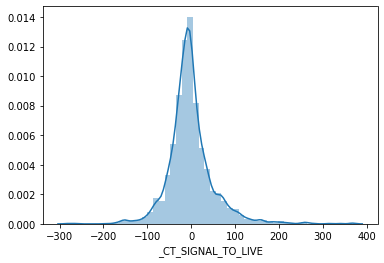

In [144]:
#Lets See if our error are normally distributed or not 
sns.distplot(y_test-pred1)

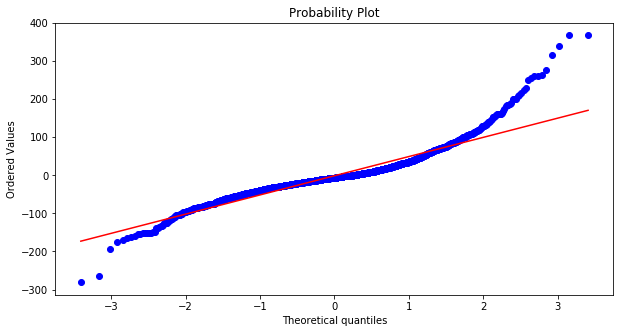

In [145]:
# Lets verify the distribution on Q-Q plot as well

import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-pred1, dist="norm", plot=pylab)
pylab.show()

### Feature Importance

In [112]:
#Lets Check the Feaure Importance 
importances=RFR1.feature_importances_

In [113]:
for feature in zip (x.columns, importances):
    print (feature)

('EngineeringGroup', 0.11232206217414803)
('PlanResourceTypeName', 0.0989467495359892)
('Region', 0.09291299103462104)
('RegionGroup', 0.011731161376726638)
('RegionType', 0.020506457363566776)
('IsMainstream', 0.0578843077617534)
('NewRegionFlag', 0.004789346130408396)
('NewDCFlag', 0.005622323004252406)
('PlanIntentName', 0.02700317145993276)
('IsNPI', 0.0053062217346814405)
('NewTechFlag', 0.009054190658759172)
('DeploymentSeverity', 0.03705687003397208)
('NumberOfRacks', 0.06795334169568011)
('_CT_SIGNAL_TO_DOCK', 0.44891080603550865)


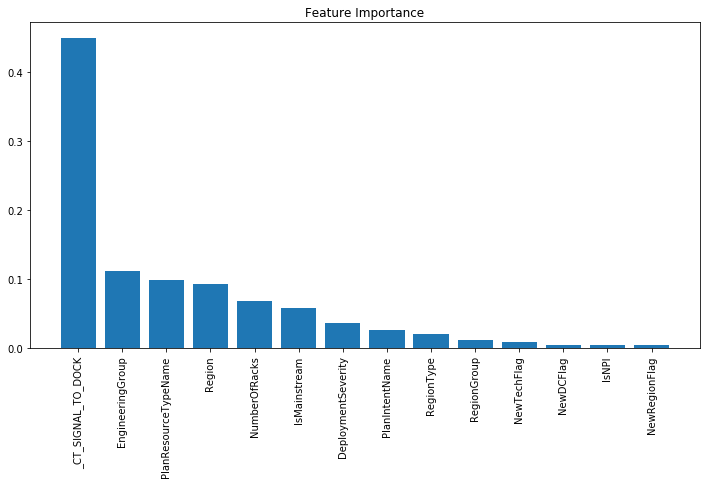

In [114]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12,6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(x.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(x.shape[1]), names, rotation=90)

# Show plot
plt.show()

### Linear Regression 

In [47]:
# Lets make a copy of df2 
df3 = df1.copy()

In [115]:
df4=pd.get_dummies(df3, drop_first=False)

In [116]:
df4.head()

,NumberOfRacks,_CT_SIGNAL_TO_DOCK,_CT_SIGNAL_TO_LIVE,EngineeringGroup_Azure,EngineeringGroup_Azure AD (MSODS),EngineeringGroup_Azure Data Lake,EngineeringGroup_Azure Front Door,EngineeringGroup_Azure Key Vault,EngineeringGroup_CloudBuild,EngineeringGroup_FOPE,EngineeringGroup_NonWebComm,EngineeringGroup_O365 Exchange,EngineeringGroup_O365 SharePoint,EngineeringGroup_OneDrive,EngineeringGroup_SAP HANA,EngineeringGroup_Search,EngineeringGroup_Unassigned,EngineeringGroup_Xbox,PlanResourceTypeName_ADL Storage,PlanResourceTypeName_AKV,PlanResourceTypeName_ActiveDir-S,PlanResourceTypeName_ActiveDirectory,PlanResourceTypeName_BM CRAY CS MT,PlanResourceTypeName_BM CRAY CSIN,PlanResourceTypeName_BM CRAY CSIN MT,PlanResourceTypeName_BM CRAY GPU,PlanResourceTypeName_BM CRAY GPU MT,PlanResourceTypeName_BM CRAY GPU OPS,PlanResourceTypeName_BM CRAY IN CORE,PlanResourceTypeName_BM CRAY MT CORE,PlanResourceTypeName_BM CRAY MT OPS,PlanResourceTypeName_BM HSM,PlanResourceTypeName_BM NetApp,PlanResourceTypeName_BM SAP LI1,PlanResourceTypeName_BM SAP MSEE,PlanResourceTypeName_BM SAP Network,PlanResourceTypeName_BM SAP Storage,PlanResourceTypeName_BM SAP VLI,PlanResourceTypeName_BM VMW CS COMP1,PlanResourceTypeName_BM VMW CS COMP2,PlanResourceTypeName_BM VMW CS MSEE,PlanResourceTypeName_BM VMWare Comp1,PlanResourceTypeName_BackEnd,PlanResourceTypeName_BackEnd-S,PlanResourceTypeName_Cafe,PlanResourceTypeName_CloudBuild,PlanResourceTypeName_Compute,PlanResourceTypeName_Compute HPC Gen 6.0,PlanResourceTypeName_Compute HPC-HB,PlanResourceTypeName_Compute-FAST,PlanResourceTypeName_Compute-SPO,PlanResourceTypeName_Confidential Compute,PlanResourceTypeName_Cosmos,PlanResourceTypeName_DNS,PlanResourceTypeName_Dedicated,PlanResourceTypeName_Dedicated Compute,PlanResourceTypeName_Discrete,PlanResourceTypeName_EOP-Capacity,PlanResourceTypeName_EOP-DI,PlanResourceTypeName_EOP-Global,PlanResourceTypeName_EOP-Sonar/ATP,PlanResourceTypeName_FPGA Compute,PlanResourceTypeName_FrontDoor,PlanResourceTypeName_FrontEnd,PlanResourceTypeName_FrontEnd-S,PlanResourceTypeName_Fv2 Compute,PlanResourceTypeName_G-ZRS Storage,PlanResourceTypeName_GPU Compute,PlanResourceTypeName_GPU Compute 6.2,PlanResourceTypeName_GPU Compute Gen 5.0,PlanResourceTypeName_GPU Compute Gen 6.0,PlanResourceTypeName_GPU Machine Learning,PlanResourceTypeName_GPU Remote Viz,PlanResourceTypeName_GPU Remote-Viz Gen 5.0,PlanResourceTypeName_GPU-v Compute Gen 5.0,PlanResourceTypeName_Game Streaming,PlanResourceTypeName_Godzilla,PlanResourceTypeName_HPC,PlanResourceTypeName_HPC-HBv2,PlanResourceTypeName_Kona/ADL,PlanResourceTypeName_Lv2 Compute,PlanResourceTypeName_M-Series,PlanResourceTypeName_MSODS,PlanResourceTypeName_MSODS - Compute,PlanResourceTypeName_Management,PlanResourceTypeName_Mv2-Series,PlanResourceTypeName_OneDrive,PlanResourceTypeName_PRD,PlanResourceTypeName_Passport - Compute,PlanResourceTypeName_PilotFish,PlanResourceTypeName_Remote Viz Gen7,PlanResourceTypeName_Resource Forest,PlanResourceTypeName_SQL Azure,PlanResourceTypeName_SQL Azure (DocDB),PlanResourceTypeName_SQL on Compute,PlanResourceTypeName_SQLDW Local Storage,PlanResourceTypeName_SWE,PlanResourceTypeName_Search,PlanResourceTypeName_Storage,PlanResourceTypeName_StorageFast,PlanResourceTypeName_Substrate,PlanResourceTypeName_Torus,PlanResourceTypeName_XArchive HDD,PlanResourceTypeName_XDirect,PlanResourceTypeName_XIO Compute,PlanResourceTypeName_XIO Storage,PlanResourceTypeName_XTransport DBX,PlanResourceTypeName_Xarchive,PlanResourceTypeName_Xtransport,PlanResourceTypeName_ZRS Storage,PlanResourceTypeName_ZRS StorageFast,Region_APAC North,Region_APAC Southeast 2,Region_Australia Central,Region_Australia Central 2,Region_Australia East,Region_Australia Southeast,Region_Brazil East,Region_Brazil North,Region_Brazil Northeast,Region_Brazil South,Region_Brazil Southeast,Region_Canada Central,Region_Canada East,Region_Central India,Region_Central US,Region_Central US EUAP,Region_Chile Central,Region_China East,Region_China East 2

In [117]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7074 entries, 0 to 7073
Columns: 213 entries, NumberOfRacks to DeploymentSeverity_4
dtypes: int64(3), uint8(210)
memory usage: 1.6 MB


In [118]:
# lets define our predictors and target variable
x = df4.drop('_CT_SIGNAL_TO_LIVE', axis=1)
y = df4['_CT_SIGNAL_TO_LIVE']

In [119]:
#lets split our data into Train and Test 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### StatsModel 

In [125]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
x_train = sm.add_constant(x_train)
# create and fit a model
lr = sm.OLS(y_train,x_train.astype(float))
lr_result=lr.fit()

In [126]:
# print the coefficients
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:     _CT_SIGNAL_TO_LIVE   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     37.47
Date:                Fri, 19 Jun 2020   Prob (F-statistic):               0.00
Time:                        13:21:57   Log-Likelihood:                -27264.
No. Observations:                4951   AIC:                         5.489e+04
Df Residuals:                    4770   BIC:                         5.607e+04
Df Model:                         180                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [127]:
# predictions using the model
y_pred_train = lr_result.predict(x_train)
y_pred_test = lr_result.predict(sm.add_constant(x_test))

In [128]:
#Error Terms 
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
MAE_train = mean_absolute_error(y_train, y_pred_train)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
MAE_test = mean_absolute_error(y_test, y_pred_test)
r_squared_test = r2_score(y_test, y_pred_test)

In [65]:
#For Manual Comparision of the actual values and predicted values,lets export it to CSV files 
y_pred_test.to_csv('y_pred_test.csv',index=0)
y_test.to_csv('y_test.csv',index=0)

In [129]:
#Error Terms and Coefficient of determination
print('rmse_train :',rmse_train, 'MAE_train', MAE_train)
print('rmse_test :',rmse_test, 'MAE_test', MAE_test)
print('r_square_value :',r_squared_test)

rmse_train : 59.61180879538542 MAE_train 39.53330408255409
rmse_test : 57.39115711079351 MAE_test 39.95529747115016
r_square_value : 0.5977909012999061


Lets Visulize the Actual values and predicted values 

Text(0, 0.5, 'Cycle Time')

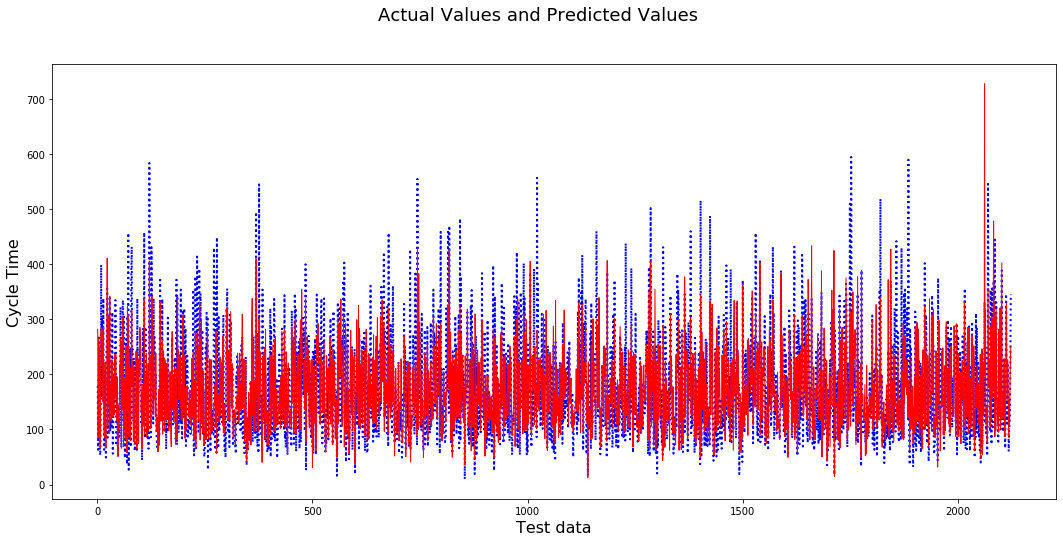

In [136]:
#Actual values vs Predicted Values
s = [i for i in range(1,2124,1)]  # 2123 is the size of our Test data(i.e y_test)
fig = plt.figure(figsize=(18,8))

plt.plot(s,y_test, color="blue", linewidth=2, linestyle=":")
plt.plot(s,y_pred_test, color="red",  linewidth=1, linestyle="-")

#Heading 
fig.suptitle('Actual Values and Predicted Values', fontsize=18) 

# printing X-label and Y-label
plt.xlabel('Test data', fontsize=16)                               
plt.ylabel('Cycle Time', fontsize=16)                            

Text(0, 0.5, 'Error')

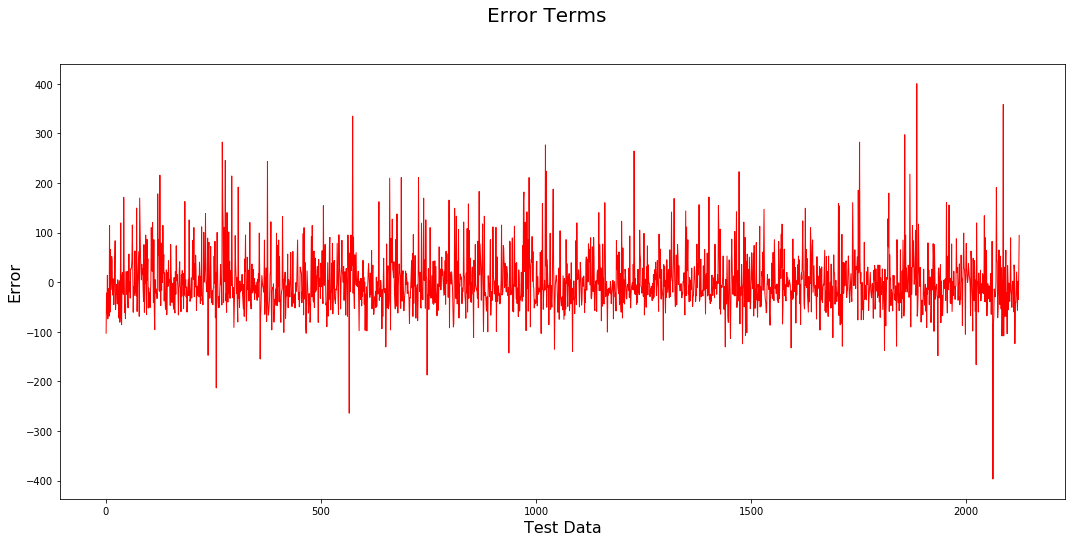

In [141]:
# Error terms
c = [i for i in range(1,2124,1)] # 2123 is the size of our Test data(i.e y_test)

fig = plt.figure(figsize=(18,8))
plt.plot(c,y_test-y_pred_test, color="red", linewidth=1, linestyle="-")

# heading 
fig.suptitle('Error Terms', fontsize=20)  

# printing X-label and Y-label
plt.xlabel('Test Data', fontsize=16)                     
plt.ylabel('Error', fontsize=16)

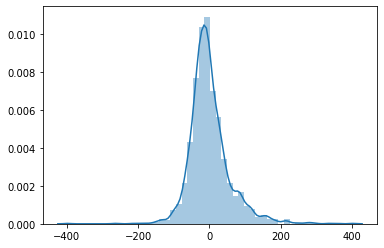

In [142]:
#Lets See if our error are normally distributed or not 

sns.distplot(y_test-y_pred_test)

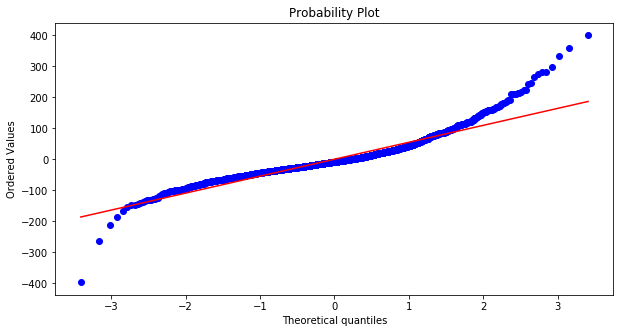

In [143]:
# Lets verify the distribution on Q-Q plot as well

import scipy.stats as stats
import pylab
fig = plt.figure(figsize=(10,5))
stats.probplot(y_test-y_pred_test, dist="norm", plot=pylab)
pylab.show()

In [ ]:
# Overall Observations:
#1. RandomForestRegressor is performing better than Linear regression if we consider _CT_SIGNAL_TO_DOCK varible (metrics- Considering coeffient of Determination,MSE,RMSE)
#2. Performance drop happens if we do not consider _CT_SIGNAL_TO_DOCK feature in both the models. 
#3. Is _CT_SIGNAL_TO_DOCK inclusive of _CT_SIGNAL_TO_LIVE or is it indipendent variable? -Query?? 
#5. _CT_SIGNAL_TO_DOCK is the only varible which shows positive corelation with the responce variable.
#4. Errors are normally distributed for both cases.
#6. In case of linear regression, we could get rid of some rare catogories in the features, which intern will reduce the overall size of th dataset post OneHotEncoding. But this approch would lead us to loss of some information.
#7. The other approch would be to substitute "Other catogory" (as such words) in place of rare catogories. This way, we do not loose any information and could control the dataset dimentions.  